# Instructions
The Singapore government has asked you to help them determine how much energy they have saved per year by recycling. You need to answer the following question:

<b>How much energy in kiloWatt hour (kWh) has Singapore saved per year by recycling glass, plastic, ferrous, and non-ferrous metals between 2015 and 2019?</b>

Save your answer as a DataFrame named annual_energy_savings with the an index labelled year. Your DataFrame should consist of one column, total_energy_saved, which contains the total amount of energy in kWh saved per year across the four materials described above. 

## Energy saved from recycling
<p>Did you know that recycling saves energy by reducing or eliminating the need to make materials from scratch? For example, aluminum can manufacturers can skip the energy-costly process of producing aluminum from ore by cleaning and melting recycled cans. Aluminum is classified as a non-ferrous metal.</p>
<p>Singapore has an ambitious goal of becoming a zero-waste nation. The amount of waste disposed of in Singapore has increased seven-fold over the last 40 years. At this rate, Semakau Landfill, Singapore’s only landfill, will run out of space by 2035. Making matters worse, Singapore has limited land for building new incineration plants or landfills.</p>
<p>The government would like to motivate citizens by sharing the total energy that the combined recycling efforts have saved every year. They have asked you to help them.</p>
<p>You have been provided with three datasets. The data come from different teams, so the names of waste types may differ.</p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:16px"><b>datasets/wastestats.csv - Recycling statistics per waste type for the period 2003 to 2017</b>
    </div>
    <div>Source: <a href="https://www.nea.gov.sg/our-services/waste-management/waste-statistics-and-overall-recycling">Singapore National Environment Agency</a></div>
<ul>
    <li><b>waste_type: </b>The type of waste recycled.</li>
    <li><b>waste_disposed_of_tonne: </b>The amount of waste that could not be recycled (in metric tonnes).</li>
    <li><b>total_waste_recycle_tonne: </b>The amount of waste that could be recycled (in metric tonnes).</li>
    <li><b>total_waste_generated: </b>The total amount of waste collected before recycling (in metric tonnes).</li>
    <li><b>recycling_rate: </b>The amount of waste recycled per tonne of waste generated.</li>
    <li><b>year: </b>The recycling year.</li>
</ul>
    </div>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6; margin-top: 17px;">
    <div style="font-size:16px"><b>datasets/2018_2019_waste.csv - Recycling statistics per waste type for the period 2018 to 2019</b>
    </div>
    <div> Source: <a href="https://www.nea.gov.sg/our-services/waste-management/waste-statistics-and-overall-recycling">Singapore National Environment Agency</a></div>
<ul>
    <li><b>Waste Type: </b>The type of waste recycled.</li>
    <li><b>Total Generated: </b>The total amount of waste collected before recycling (in thousands of metric tonnes).</li> 
    <li><b>Total Recycled: </b>The amount of waste that could be recycled. (in thousands of metric tonnes).</li>
    <li><b>Year: </b>The recycling year.</li>
</ul>
    </div>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6; margin-top: 17px;">
    <div style="font-size:16px"><b>datasets/energy_saved.csv -  Estimations of the amount of energy saved per waste type in kWh</b>
    </div>
<ul>
    <li><b>material: </b>The type of waste recycled.</li>
    <li><b>energy_saved: </b>An estimate of the energy saved (in kiloWatt hour) by recycling a metric tonne of waste.</li> 
    <li><b>crude_oil_saved: </b>An estimate of the number of barrels of oil saved by recycling a metric tonne of waste.</li>
</ul>

</div>
<pre><code>
</code></pre>

#### Plan of action
1. 2018_2019 datasets recycled material value is converted to tons from 1000 tons
2. Both datasets have same features 

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Waste data from 2003 - 2017

In [68]:
waste_03_17 = pd.read_csv('datasets/wastestats.csv')
waste_03_17.head()

,waste_type,waste_disposed_of_tonne,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
0,Food,679900,111100.0,791000,0.14,2016
1,Paper/Cardboard,576000,607100.0,1183100,0.51,2016
2,Plastics,762700,59500.0,822200,0.07,2016
3,C&D,9700,1585700.0,1595400,0.99,2016
4,Horticultural waste,111500,209000.0,320500,0.65,2016


In [69]:
# Only considering these three columns for analysis
waste_03_17 = waste_03_17[['waste_type','total_waste_recycled_tonne','year']]
waste_03_17 = waste_03_17[(waste_03_17['waste_type'] == 'Glass') |
                          (waste_03_17['waste_type'] == 'Plastics') |
                          (waste_03_17['waste_type'] == 'Ferrous Metal') |
                          (waste_03_17['waste_type'] == 'Non-Ferrous Metal')]

In [70]:
waste_03_17.head()

,waste_type,total_waste_recycled_tonne,year
2,Plastics,59500.0,2016
10,Glass,14700.0,2016
17,Plastics,57800.0,2015
25,Glass,14600.0,2015
32,Plastics,80000.0,2014


In [71]:
#Renaming the name of columns same for all the data
waste_03_17.columns = ['Waste Type','Total Recycled_ton','Year']

In [72]:
waste_03_17.reset_index(inplace=True)

In [73]:
waste_03_17.drop(['index'],inplace=True,axis=1)

In [74]:
# Checking that all non nulls values are present
waste_03_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Waste Type          36 non-null     object 
 1   Total Recycled_ton  36 non-null     float64
 2   Year                36 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 992.0+ bytes


In [75]:
waste_03_17.head()

,Waste Type,Total Recycled_ton,Year
0,Plastics,59500.0,2016
1,Glass,14700.0,2016
2,Plastics,57800.0,2015
3,Glass,14600.0,2015
4,Plastics,80000.0,2014


### Loading Waste data from 2018 - 2019

In [76]:
waste_18_19 = pd.read_csv('datasets/2018_2019_waste.csv')
waste_18_19.head()

,Waste Type,Total Generated ('000 tonnes),Total Recycled ('000 tonnes),Year
0,Construction& Demolition,1440,1434,2019
1,Ferrous Metal,1278,1270,2019
2,Paper/Cardboard,1011,449,2019
3,Plastics,930,37,2019
4,Food,7440,136,2019


In [77]:
# Keep only those those waste types which are needed
waste_18_19 = waste_18_19[(waste_18_19['Waste Type'] == 'Glass') |
                          (waste_18_19['Waste Type'] == 'Plastics') |
                          (waste_18_19['Waste Type'] == 'Ferrous Metal') |
                          (waste_18_19['Waste Type'] == 'Non-Ferrous Metal')]

In [78]:
#Converting the data from 1000 tons to tons for uniformity
waste_18_19["Total Recycled_ton"] = waste_18_19["Total Recycled ('000 tonnes)"]*1000

In [79]:
waste_18_19.head()

,Waste Type,Total Generated ('000 tonnes),Total Recycled ('000 tonnes),Year,Total Recycled_ton
1,Ferrous Metal,1278,1270,2019,1270000
3,Plastics,930,37,2019,37000
10,Non-Ferrous Metal,126,124,2019,124000
11,Glass,75,11,2019,11000
16,Ferrous Metal,1269,126,2018,126000


In [80]:
# Considering only these three columns
waste_18_19 = waste_18_19[['Waste Type','Total Recycled_ton','Year']]

In [81]:
waste_18_19.reset_index(drop=True,inplace=True)

In [82]:
waste_18_19.columns

Index(['Waste Type', 'Total Recycled_ton', 'Year'], dtype='object')

In [83]:
waste_18_19.head()

,Waste Type,Total Recycled_ton,Year
0,Ferrous Metal,1270000,2019
1,Plastics,37000,2019
2,Non-Ferrous Metal,124000,2019
3,Glass,11000,2019
4,Ferrous Metal,126000,2018


#### Combining waste data from 2003 - 2019 in one dataframe with only three columns

In [84]:
complete_waste_data= pd.concat([waste_03_17,waste_18_19])
complete_waste_data.head()

,Waste Type,Total Recycled_ton,Year
0,Plastics,59500.0,2016
1,Glass,14700.0,2016
2,Plastics,57800.0,2015
3,Glass,14600.0,2015
4,Plastics,80000.0,2014


In [85]:
complete_waste_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 7
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Waste Type          44 non-null     object 
 1   Total Recycled_ton  44 non-null     float64
 2   Year                44 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.4+ KB


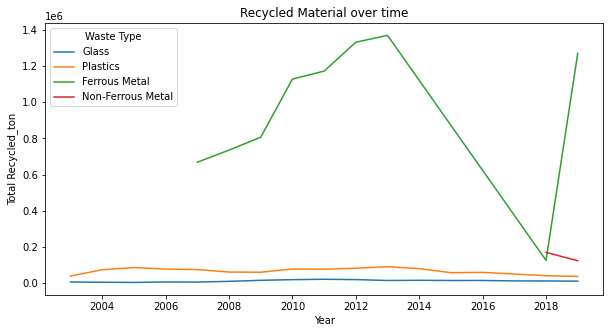

In [86]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year',y='Total Recycled_ton',hue='Waste Type',data=complete_waste_data.sort_values(by='Year'))
plt.title('Recycled Material over time')
plt.show()

### Loading data containing  estimations of the amount of energy saved per waste type in kWh

In [87]:
one_barrel = "159 litres"

def preprocess(r):
    """Takes series"""
    r = r.str.split().str[0].astype(float)
    return r

def clean_energysaved_data(file):
    df = pd.read_csv('datasets/energy_saved.csv')
    df = df.T
    df.reset_index(drop=True,inplace=True)
    df = df.iloc[1:,2:]
    df.columns = ['material','energy_saved_Kwh_per_metric_ton','crude_oil_saved_Kwh_per_metric_ton']
    
    #remove nan value
    df.iloc[1,2] = '0 barrells'
    
    #preprocess
    df['energy_saved_Kwh_per_metric_ton'] = preprocess(df['energy_saved_Kwh_per_metric_ton'])
    df['crude_oil_saved_Kwh_per_metric_ton'] = preprocess(df['crude_oil_saved_Kwh_per_metric_ton'])*1700
    
    
    return df

In [88]:
energy_saved_waste_type = clean_energysaved_data('datasets/energy_saved.csv')

In [89]:
energy_saved_waste_type['total_energy_Kwh_per_metric_ton'] = energy_saved_waste_type['energy_saved_Kwh_per_metric_ton'] + energy_saved_waste_type['crude_oil_saved_Kwh_per_metric_ton']

In [90]:
energy_saved_waste_type.drop(['crude_oil_saved_Kwh_per_metric_ton','energy_saved_Kwh_per_metric_ton'],axis=1,inplace=True)

In [91]:
energy_saved_waste_type.head()

,material,total_energy_Kwh_per_metric_ton
1,Plastic,32974.0
2,Glass,42.0
3,Ferrous Metal,3702.0
4,Non-Ferrous Metal,82000.0
5,Paper,6890.0


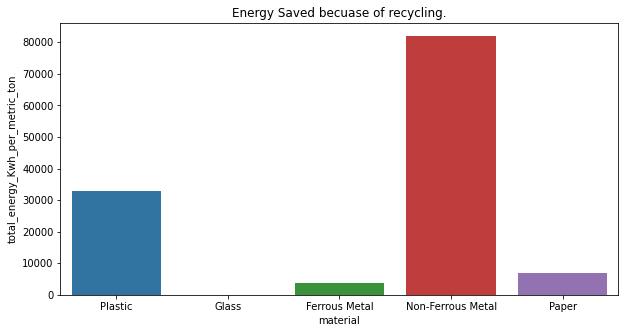

In [93]:
plt.figure(figsize=(10,5))
sns.barplot(x='material',y='total_energy_Kwh_per_metric_ton',data=energy_saved_waste_type)
plt.title('Energy Saved becuase of recycling.')
plt.show()

In [94]:
#Replacing P;astics with P;astic as energy_Saved_data contains Plastic as Material
complete_waste_data = complete_waste_data.replace('Plastics','Plastic')

In [95]:
complete_waste_data = complete_waste_data.sort_values(by=['Waste Type'])

In [96]:
#Adding a new column
complete_waste_data['energy_saved'] = 0.0

In [97]:
complete_waste_data['energy_saved'] = complete_waste_data['energy_saved'].astype(float)
complete_waste_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 21
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Waste Type          44 non-null     object 
 1   Total Recycled_ton  44 non-null     float64
 2   Year                44 non-null     int64  
 3   energy_saved        44 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.7+ KB


In [99]:
plastic = complete_waste_data[complete_waste_data['Waste Type'] == 'Plastic']['Total Recycled_ton']
p_mult = energy_saved_waste_type[energy_saved_waste_type['material']=='Plastic']['total_energy_Kwh_per_metric_ton'].values.astype(int)
plastic *= p_mult
plastic

1     1.220038e+09
5     1.351934e+09
33    1.289283e+09
0     1.961953e+09
29    2.835764e+09
27    2.565377e+09
24    2.473050e+09
18    1.988332e+09
15    2.575269e+09
12    2.538998e+09
9     2.707165e+09
6     3.003931e+09
4     2.637920e+09
2     1.905897e+09
31    2.443373e+09
21    2.018009e+09
Name: Total Recycled_ton, dtype: float64

In [101]:
ferrous = complete_waste_data[complete_waste_data['Waste Type'] == 'Ferrous Metal']['Total Recycled_ton']
f_mult = energy_saved_waste_type[energy_saved_waste_type['material']=='Ferrous Metal']['total_energy_Kwh_per_metric_ton'].values.astype(int)
ferrous *= f_mult
ferrous

0     4.701540e+09
25    2.472936e+09
4     4.664520e+08
7     5.068778e+09
22    2.720970e+09
10    4.928102e+09
19    2.984552e+09
13    4.337263e+09
16    4.174005e+09
Name: Total Recycled_ton, dtype: float64

In [102]:
n_ferrous = complete_waste_data[complete_waste_data['Waste Type'] == 'Non-Ferrous Metal']['Total Recycled_ton']
nf_mult = energy_saved_waste_type[energy_saved_waste_type['material']=='Non-Ferrous Metal']['total_energy_Kwh_per_metric_ton'].values.astype(int)
n_ferrous *= nf_mult
n_ferrous

2    1.016800e+10
6    1.394000e+10
Name: Total Recycled_ton, dtype: float64

In [103]:
glass = complete_waste_data[complete_waste_data['Waste Type'] == 'Glass']['Total Recycled_ton']
g_mult = energy_saved_waste_type[energy_saved_waste_type['material']=='Glass']['total_energy_Kwh_per_metric_ton'].values.astype(int)
glass *= g_mult
glass

28    268800.0
26    243600.0
34    260400.0
23    420000.0
20    655200.0
35    520800.0
17    806400.0
7     504000.0
14    898800.0
11    819000.0
8     613200.0
3     462000.0
5     659400.0
3     613200.0
1     617400.0
32    205800.0
30    159600.0
Name: Total Recycled_ton, dtype: float64

In [104]:
series_list = [ferrous,glass,n_ferrous,plastic]
res = pd.concat(series_list, axis=0)
print(res)

0     4.701540e+09
25    2.472936e+09
4     4.664520e+08
7     5.068778e+09
22    2.720970e+09
10    4.928102e+09
19    2.984552e+09
13    4.337263e+09
16    4.174005e+09
28    2.688000e+05
26    2.436000e+05
34    2.604000e+05
23    4.200000e+05
20    6.552000e+05
35    5.208000e+05
17    8.064000e+05
7     5.040000e+05
14    8.988000e+05
11    8.190000e+05
8     6.132000e+05
3     4.620000e+05
5     6.594000e+05
3     6.132000e+05
1     6.174000e+05
32    2.058000e+05
30    1.596000e+05
2     1.016800e+10
6     1.394000e+10
1     1.220038e+09
5     1.351934e+09
33    1.289283e+09
0     1.961953e+09
29    2.835764e+09
27    2.565377e+09
24    2.473050e+09
18    1.988332e+09
15    2.575269e+09
12    2.538998e+09
9     2.707165e+09
6     3.003931e+09
4     2.637920e+09
2     1.905897e+09
31    2.443373e+09
21    2.018009e+09
Name: Total Recycled_ton, dtype: float64


In [105]:
complete_waste_data['energy_saved'] = res

In [106]:
res_df = complete_waste_data.groupby('Year')['energy_saved'].sum()

In [107]:
res_df = res_df.to_frame()

In [108]:
res_df.columns = ['total_energy_saved']

In [109]:
res_df.head()

,total_energy_saved
Year,
2003,1.289544e+09
2004,2.443579e+09
2005,2.835924e+09
2006,2.565646e+09
2007,4.946230e+09


In [110]:
#renaming index as required for final submission
res_df.index.names = ['year']

In [111]:
#storing only energy saved from 2015 to 2019
annual_energy_savings = res_df.loc['2015':'2019']
annual_energy_savings.head()

,total_energy_saved
year,
2015,1.906510e+09
2016,1.962570e+09
2017,5.208000e+05
2018,1.575889e+10
2019,1.609004e+10


<Figure size 720x360 with 0 Axes>

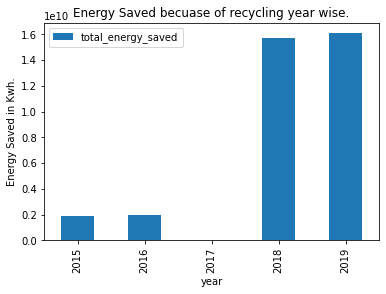

In [112]:
plt.figure(figsize=(10,5))
annual_energy_savings.plot.bar()
plt.title('Energy Saved becuase of recycling year wise.')
plt.ylabel('Energy Saved in Kwh.')
plt.show()

## Conclusion
Energy savings has increased multifold in 2018 and 2019. Other countries should also look into the strategies followed by Singapore to heal earth.